In [2]:
import pandas as pd

"""Project Title: Exploring Regional House Price Dynamics and Property Type Trends in the UK 
Housing Market"""

#Load the dataset 

File_path =r"C:\Users\Ruwan Hasitha\OneDrive - University of Hertfordshire\Final project\UK-HPI-full-file-2024-03.csv"
df = pd.read_csv(File_path)

#Print basic information of dataset 

print(df.info())
print (df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140580 entries, 0 to 140579
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    140580 non-null  object 
 1   RegionName              140580 non-null  object 
 2   AreaCode                140580 non-null  object 
 3   AveragePrice            140580 non-null  float64
 4   Index                   140580 non-null  float64
 5   IndexSA                 4929 non-null    float64
 6   1m%Change               140156 non-null  float64
 7   12m%Change              135768 non-null  float64
 8   AveragePriceSA          4929 non-null    float64
 9   SalesVolume             136113 non-null  float64
 10  DetachedPrice           134031 non-null  float64
 11  DetachedIndex           134031 non-null  float64
 12  Detached1m%Change       133641 non-null  float64
 13  Detached12m%Change      129375 non-null  float64
 14  SemiDetachedPrice   

In [3]:
#Handling missing values in dataset

df = df.dropna()

#convert 'Date' column to datetime type
df['Date']= pd.to_datetime(df['Date'])

#Extract the year and month 

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [4]:
#filter out regions which include boder regions like "Great Britain ,England and Wales ,and England"

fillterd_df = df[~df['RegionName'].isin(['Great Britain','England','England and Wales'])]

#Verify by checking unique values in the 'RegionName' column after filtering  

fillterd_unique_regions = fillterd_df['RegionName'].unique()

#Display unique regions and the total number of unique regions 

print (fillterd_unique_regions)
print (len(fillterd_unique_regions))

['East Midlands' 'East of England' 'London' 'North East' 'North West'
 'Scotland' 'South East' 'South West' 'Wales' 'West Midlands Region'
 'Yorkshire and The Humber']
11


In [5]:
#Define the standerd 12 regions in the UK

standard_regions =[
    'London', 'South East', 'South West', 'East of England', 'West Midlands',
    'East Midlands', 'Yorkshire and The Humber', 'North West', 'North East',
    'Wales', 'Scotland', 'Northern Ireland'
]

#Filter the dataset to get only the standard regions 

df_standard = df[df['RegionName'].isin(standard_regions)]

#Summmery

print(df_standard.describe())

        AveragePrice        Index      IndexSA    1m%Change   12m%Change  \
count    1330.000000  1330.000000  1330.000000  1330.000000  1330.000000   
mean   227763.509607   118.712070   117.627272     0.373184     4.552511   
std    103140.903734    18.284887    18.118966     1.445838     4.135328   
min    112007.912300    77.290881    77.240070    -8.300000    -4.700000   
25%    149617.189050   104.201921   102.920419    -0.315072     1.684251   
50%    193580.930650   117.934668   117.093399     0.408238     4.048460   
75%    288054.560500   129.722548   128.481478     1.100000     6.729058   
max    542387.000000   162.000000   159.600000     8.400000    20.555012   

       AveragePriceSA   SalesVolume  DetachedPrice  DetachedIndex  \
count     1330.000000   1330.000000   1.330000e+03    1330.000000   
mean    226055.366369   7384.771429   3.790988e+05     119.247179   
std     103245.261717   3296.005374   2.026755e+05      18.493909   
min     110711.944000   1003.000000   1

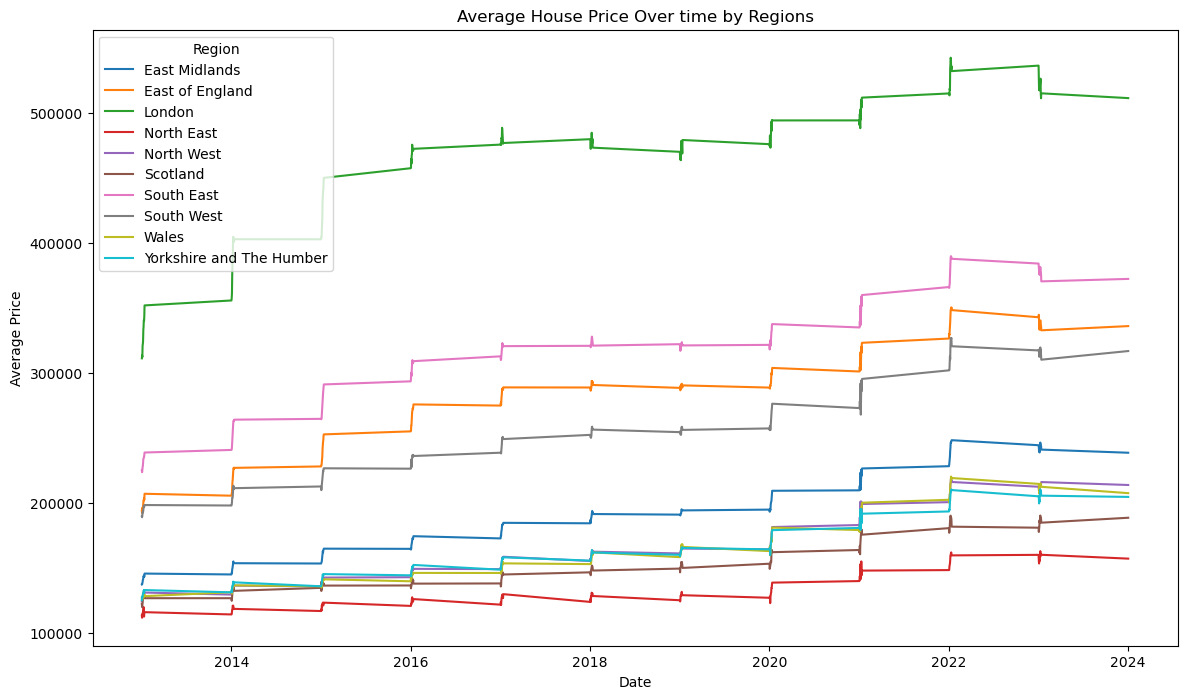

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Make line plot of average prices over time for different regions

plt.figure(figsize= (14,8))
sns.lineplot(data=df_standard, x='Date', y='AveragePrice', hue= 'RegionName')
plt.title('Average House Price Over time by Regions')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Region')
plt.show()

C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_24464\4122914390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standard['Date'] = pd.to_datetime(df_standard['Date'])


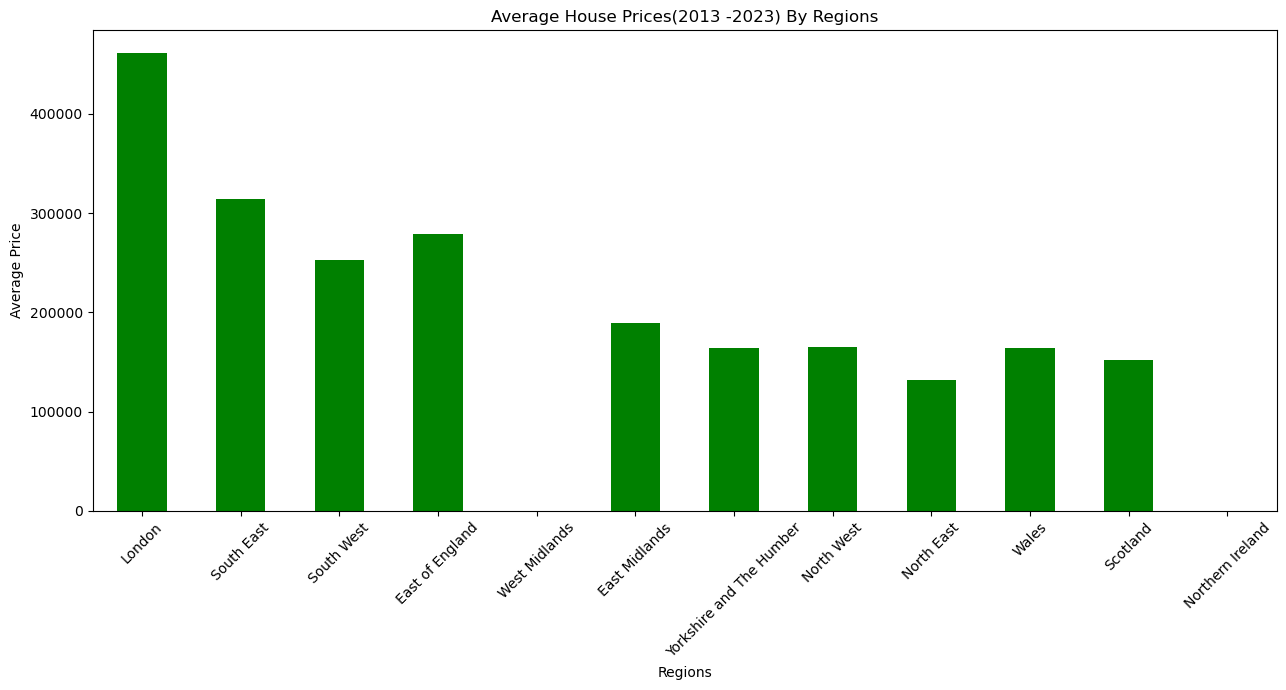

In [7]:
#Convert 'Date' to datetime format and filter for the year 2013 to 2023
df_standard['Date'] = pd.to_datetime(df_standard['Date'])
filterd_df = df_standard[(df_standard['Date'].dt.year >=2013) & (df_standard['Date'].dt.year <=2023)]

#Calculate the average for all regions over the time

average_prices = filterd_df.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)

#Plot the bar chart 
plt.figure(figsize =(13,7))
average_prices.plot(kind ='bar', color = 'green')
plt.title('Average House Prices(2013 -2023) By Regions')
plt.xlabel('Regions')
plt.ylabel('Average Price')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_24464\4139654642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standard['Date'] = pd.to_datetime(df_standard['Date'])


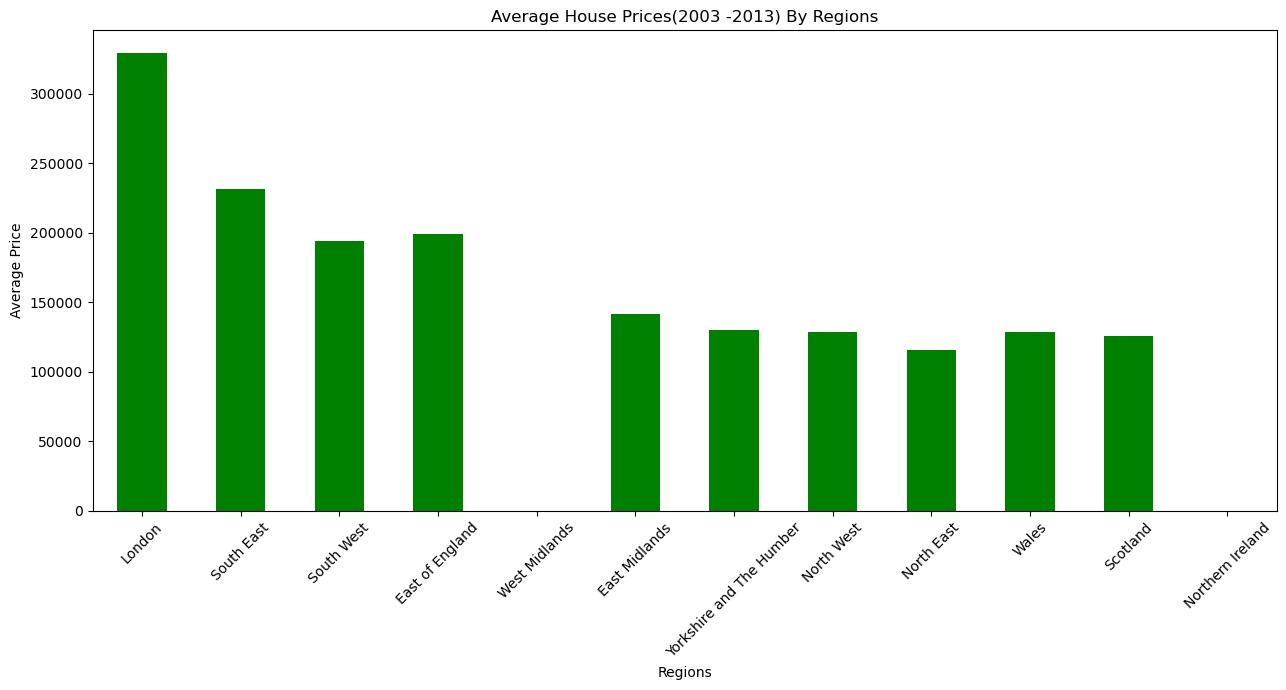

In [8]:
#Convert 'Date' to datetime format and filter for the year 2013 to 2023
df_standard['Date'] = pd.to_datetime(df_standard['Date'])
filterd_df = df_standard[(df_standard['Date'].dt.year >=2003) & (df_standard['Date'].dt.year <=2013)]

#Calculate the average for all regions over the time

average_prices = filterd_df.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)

#Plot the bar chart 
plt.figure(figsize =(13,7))
average_prices.plot(kind ='bar', color = 'green')
plt.title('Average House Prices(2003 -2013) By Regions')
plt.xlabel('Regions')
plt.ylabel('Average Price')
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

In [9]:

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd



C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_24464\3641292261.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_24464\3641292261.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [10]:

# Convert 'Date' to datetime format
df_standard['Date'] = pd.to_datetime(df_standard['Date'])

#filter two different datafreame 
filterd_df_2003_2013 = df_standard[(df_standard['Date'].dt.year >=2003) & (df_standard['Date'].dt.year <=2013)]
filterd_df_2013_2023 = df_standard[(df_standard['Date'].dt.year >=2013) & (df_standard['Date'].dt.year <=2023)]

#Replace 'standard_regions' with the unique regions present in data
standard_regions =df_standard['RegionName'].unique()

#Calculate the average for all regions over the time

average_prices_2003_2013 = filterd_df_2003_2013.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)
average_prices_2013_2023 = filterd_df_2013_2023.groupby('RegionName')['AveragePrice'].mean().reindex(standard_regions)


# Initialize Dash app
app = dash.Dash(__name__)

#Layout of the dashboard
app.layout =html.Div([
      html.H1("Average House Price by Region"),
    
   #First plot for 2002-2013
    html.Div([
        html.H2("2003-2013"),
        dcc.Graph(
        id='bar-chart-2003-2013',
        figure=px.bar(
           x= average_prices_2003_2013.index,
           y= average_prices_2003_2013.values,
           labels={'x': 'Region','y': 'Average Price'},
           title='Average House Prices (2003-2013) By Region'
           ).update_layout(
               xaxis_tickangle=-45
               
           )
        )
    ]),
#Second plot for 2013-2023
    html.Div([
        html.H2('2013-2023'),
        dcc.Graph(
            id='bar-chart-2013-2023',
            figure=px.bar(
                x= average_prices_2013_2023.index,
                y= average_prices_2013_2023.values,
                labels={'x': 'RegionS','y': 'Average Price'},
                title='Average House Prices (2013-2023) By Region'
           ).update_layout(
               xaxis_tickangle=-45
               
                
            )
        )
    ])
    
])

#Run the dashboard 
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\Ruwan Hasitha\AppData\Local\Temp\ipykernel_24464\522327562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_standard['Date'] = pd.to_datetime(df_standard['Date'])


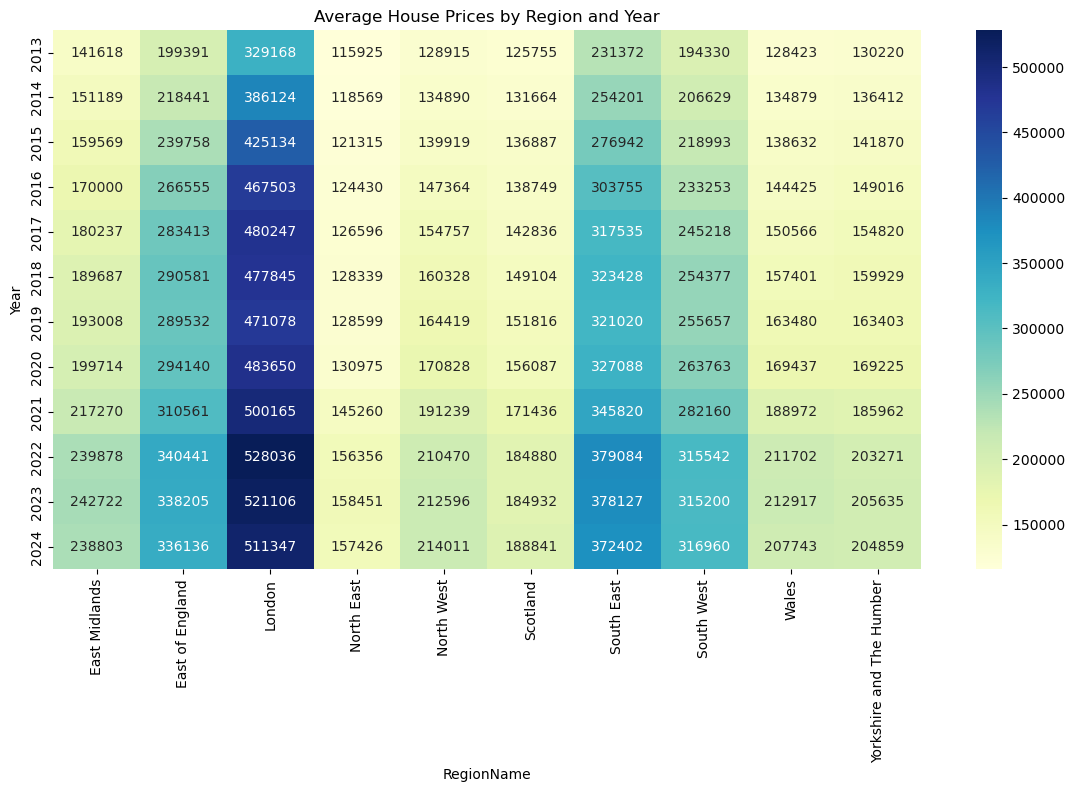

In [11]:
# Create Heatmap of average prices by region and year
pivot_table = df.pivot_table(values='AveragePrice', index='Year', columns='RegionName', aggfunc='mean')
pivot_table = pivot_table.reindex(columns=standard_regions)
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average House Prices by Region and Year')
plt.show()

In [12]:
#Filter for the last 10 years

df_filtered = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2023)]
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 38184 to 140576
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1848 non-null   datetime64[ns]
 1   RegionName              1848 non-null   object        
 2   AreaCode                1848 non-null   object        
 3   AveragePrice            1848 non-null   float64       
 4   Index                   1848 non-null   float64       
 5   IndexSA                 1848 non-null   float64       
 6   1m%Change               1848 non-null   float64       
 7   12m%Change              1848 non-null   float64       
 8   AveragePriceSA          1848 non-null   float64       
 9   SalesVolume             1848 non-null   float64       
 10  DetachedPrice           1848 non-null   float64       
 11  DetachedIndex           1848 non-null   float64       
 12  Detached1m%Change       1848 non-null   fl

In [13]:
#Group by year to get average prices for pour different property types 

group_df = df_filtered.groupby('Year').agg({
    'DetachedPrice': 'mean',
    'SemiDetachedPrice':'mean',
    'TerracedPrice' : 'mean',
    'FlatPrice' : 'mean',
    
}).reset_index()


In [14]:
#Melt the dataframe for make platting with seaborn 

melt_df = group_df.melt(id_vars =['Year'], value_vars =['DetachedPrice','SemiDetachedPrice','TerracedPrice','FlatPrice'],
                       
            var_name = 'PropertyType', value_name = 'AveragePrice')

#Set the style for plot
sns.set(style="whitegrid")

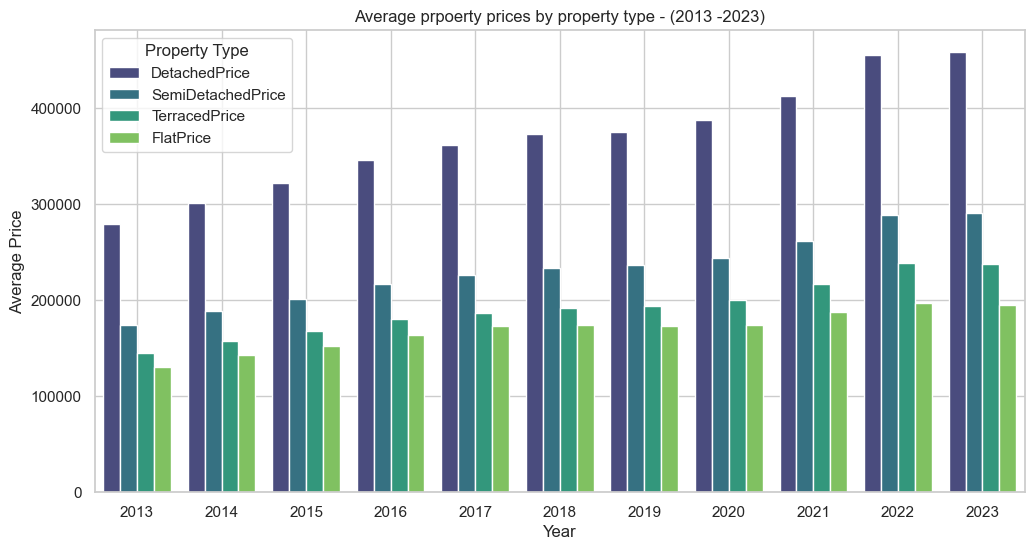

In [15]:
#Create the bar chart

plt.figure(figsize= (12,6))
sns.barplot(data =melt_df, x= 'Year', y= 'AveragePrice', hue= 'PropertyType', palette ='viridis')

#Add title and labels to bar chart 

plt.title('Average prpoerty prices by property type - (2013 -2023)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title= 'Property Type')
plt.grid(True)

#Show the result of bar chart 
plt.show()


In [16]:
pip install pandas plotly dash

Note: you may need to restart the kernel to use updated packages.


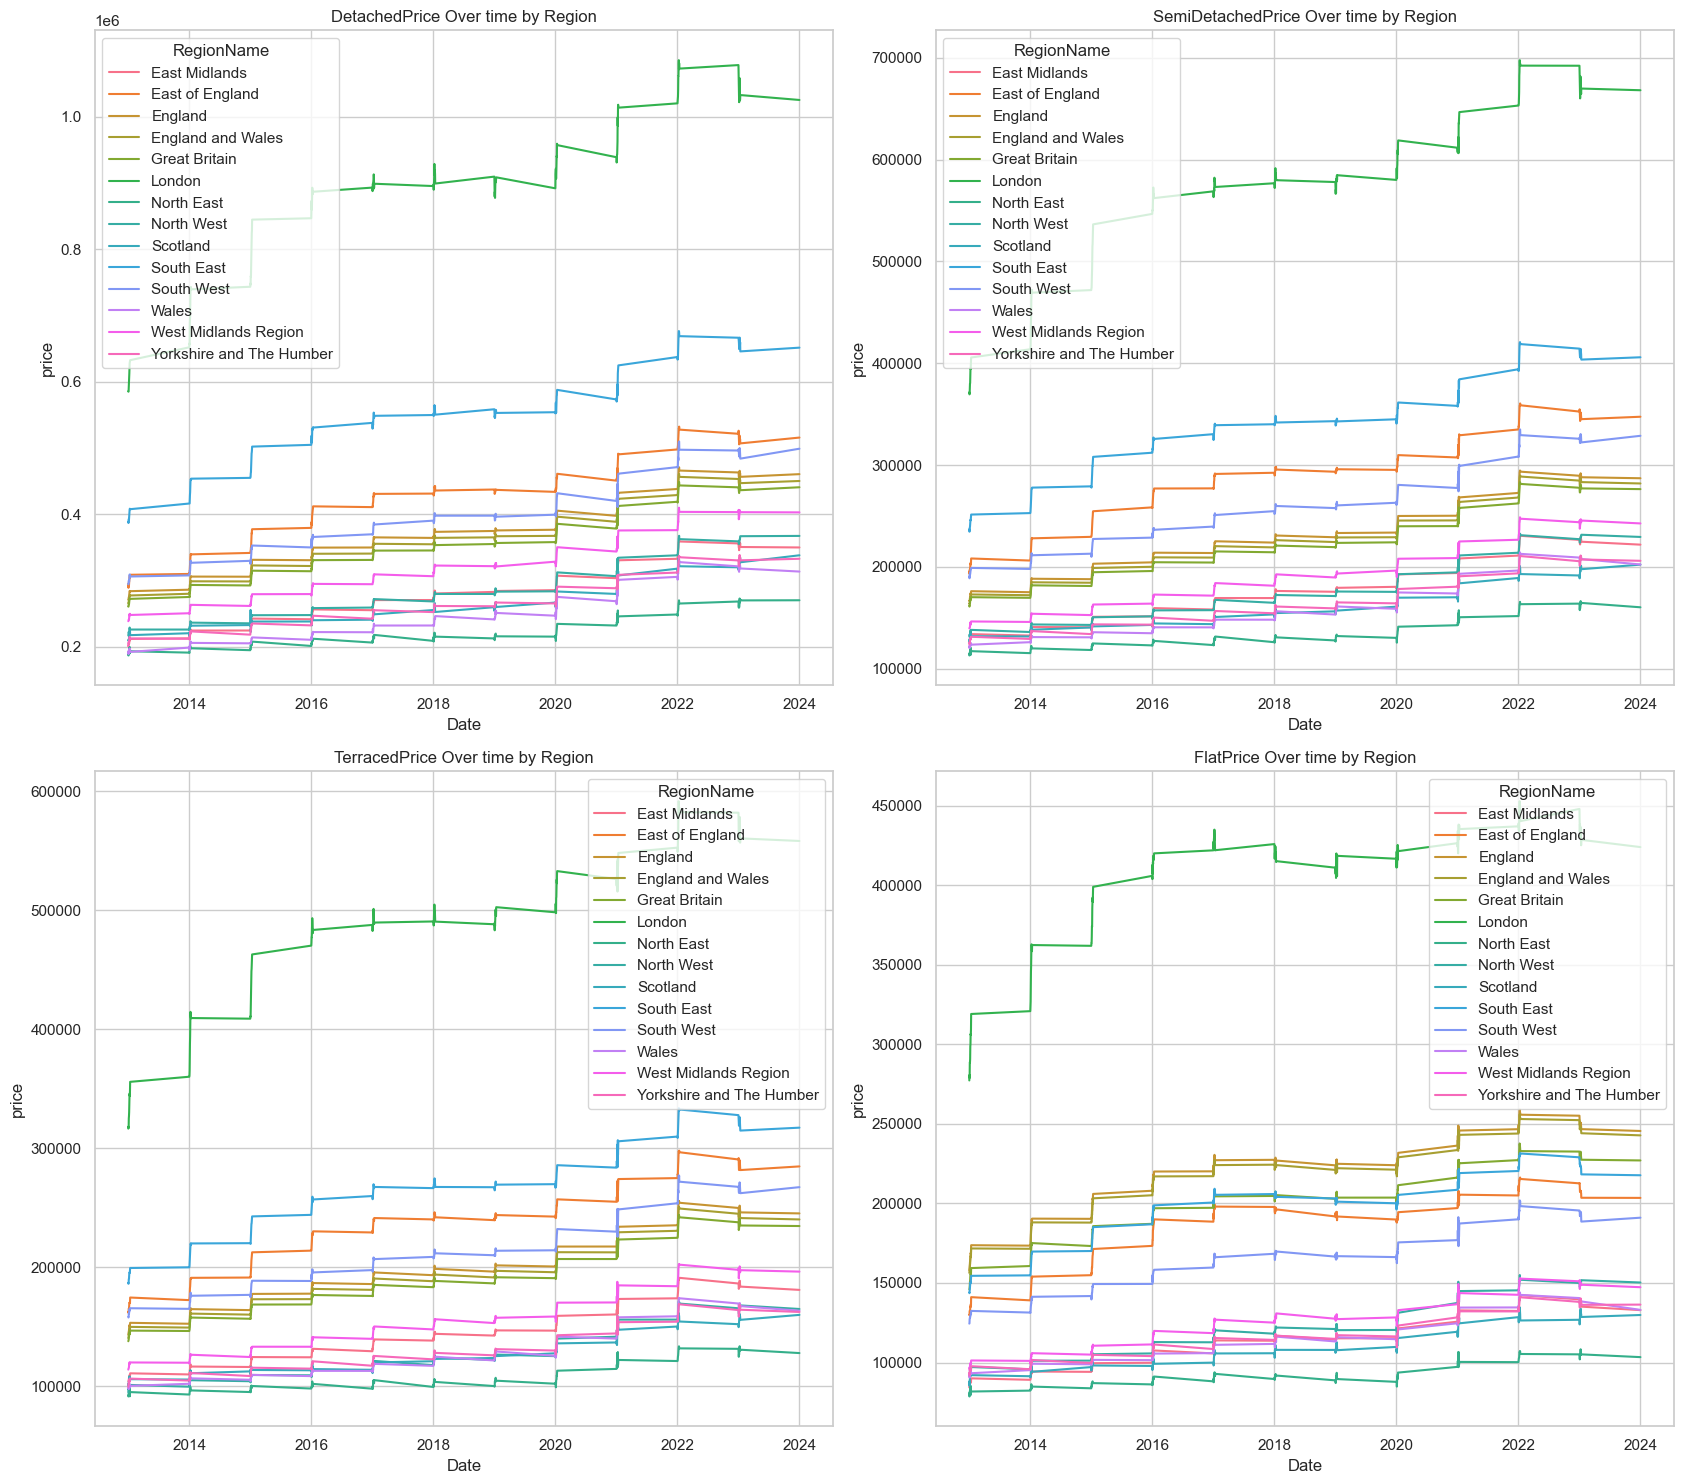

In [17]:
#Define property types 

property_types = [ 'DetachedPrice', 'SemiDetachedPrice','TerracedPrice','FlatPrice']

# Create a one figure with four different subplots for property types 
fig, axes = plt.subplots(2,2, figsize =(17,15))

#Flatten the axes array for easy iteration 
axes = axes.flatten()


#Make a loop for create subplots to each property type 

for i, prop in enumerate (property_types):
                 sns.lineplot(data=df, x= 'Date', y=prop, hue='RegionName', ax =axes[i] )
                 axes[i].set_title(f'{prop} Over time by Region')
                 axes[i].set_xlabel('Date')
                 axes[i].set_ylabel('price')
                
#Adjust layout
plt.tight_layout()
plt.show()


In [18]:
#Trend analysis for average house price by purchase Method 

#Filter relavant coloumns from dataset
Sales_Trends = ['Year','CashPrice','MortgagePrice','CashSalesVolume','MortgageSalesVolume']
df_filtered_Sales = df[Sales_Trends]

#Remove any rows with missing values in the coumn of interest 

df_filtered_Sales = df_filtered_Sales.dropna()

In [19]:
#Aggregate data by year to calculate mean values 

yearly_data = df_filtered_Sales.groupby('Year').mean().reset_index()

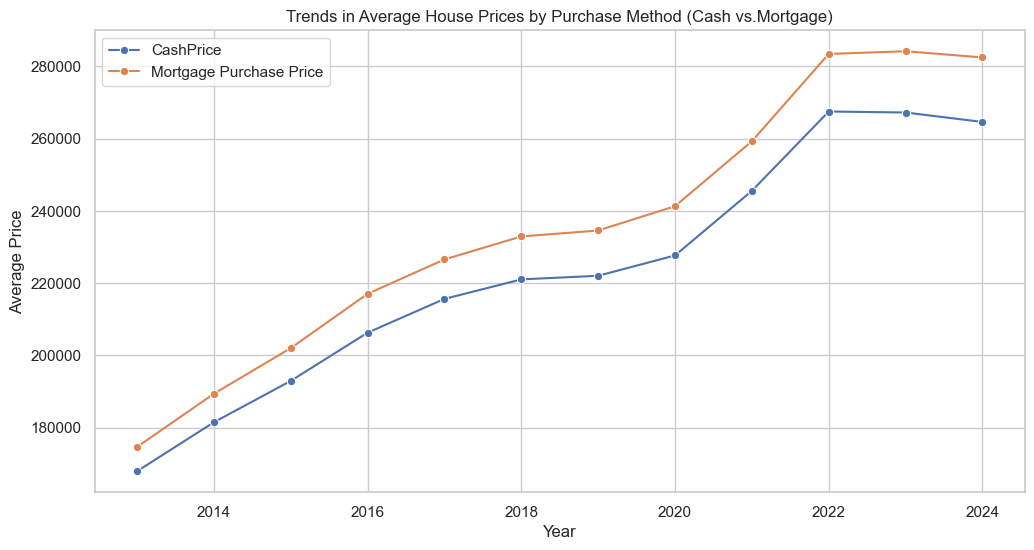

In [20]:
#Create plots trends in average price 

plt.figure(figsize=(12,6))
sns.lineplot(data =yearly_data, x='Year', y='CashPrice',label= 'CashPrice', marker ='o')
sns.lineplot(data =yearly_data, x='Year', y='MortgagePrice',label = 'Mortgage Purchase Price', marker ='o')
plt.title('Trends in Average House Prices by Purchase Method (Cash vs.Mortgage)')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

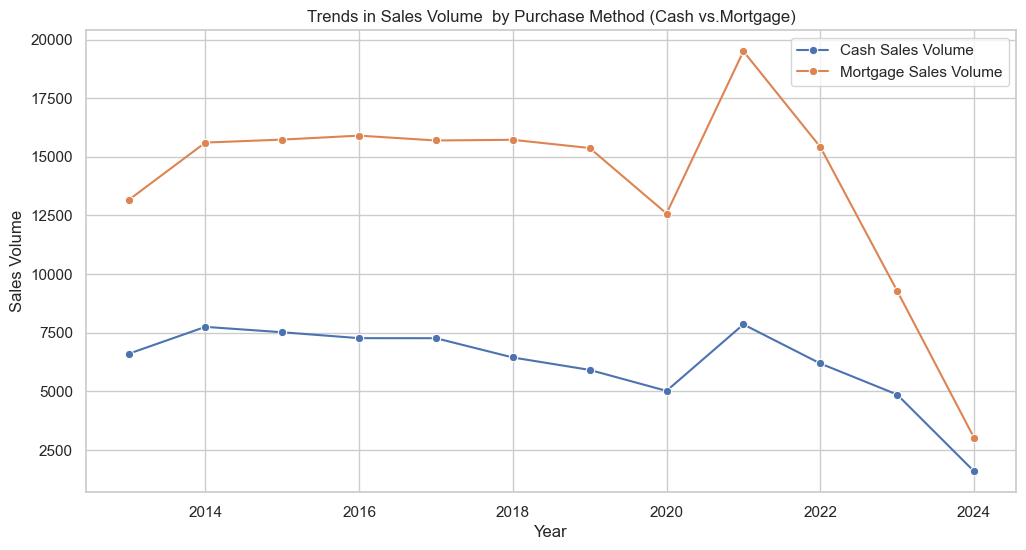

In [21]:
#Trend analysis for  Sales values by purchase Method 
#Plot trends in sales volume
plt.figure(figsize=(12,6))
sns.lineplot(data =yearly_data, x='Year', y='CashSalesVolume',label= 'Cash Sales Volume', marker ='o')
sns.lineplot(data =yearly_data, x='Year', y='MortgageSalesVolume',label = 'Mortgage Sales Volume', marker ='o')
plt.title('Trends in Sales Volume  by Purchase Method (Cash vs.Mortgage)')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend()
plt.grid(True)
plt.show()